# Project Two: Investigate a Dataset - Twitter Dog Rating Data

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Data Analysis and Visualizations</a></li>
</ul>

In [429]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import os, re, ast, time
import numpy as np
import pandas as pd
import requests
import tweepy
import matplotlib.pyplot as plt
#import seaborn as sns

%matplotlib inline

<a id='gathering'></a>
## Data Gathering

### Data Gathering for [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

In [430]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [431]:
twitter_archive_enhanced.shape

(2356, 17)

In [432]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Data Gathering from [the tweet image predictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

In [433]:
## Download the tweet image preediction data programmatically from the Udacity servers using 'requests'
tweet_image_download = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
tweet_image_tsv = [i.split('\t') for i in tweet_image_download.text.split('\n')]
headers = tweet_image_tsv[0]
tweet_image_data = pd.DataFrame(tweet_image_tsv[1:])
tweet_image_data.columns = headers

In [434]:
tweet_image_data.shape

(2076, 12)

In [435]:
tweet_image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Additional data from the Twitter API using _tweepy_

In [436]:
tweet_image_data.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
2075                      
Name: tweet_id, Length: 2076, dtype: object

In [437]:
# with open('../startup.txt', 'r') as keys:
#     twikeys = [i.split(':') for i in keys.read().split('\n')]
#     for i in twikeys:
#         os.environ[i[0]] = i[1]

In [438]:
# auth = tweepy.OAuthHandler(os.environ['TWI_API_KEY'], os.environ['TWI_API_SECRET'])
# auth.set_access_token(os.environ['TWI_ACCESS_TOKEN'], os.environ['TWI_ACCESS_SECRET'])
# api = tweepy.API(auth, wait_on_rate_limit = True)  
# # fetching the tweet json data and storing it in a .txt file
# #status._json

In [439]:
# #Generate the text file containing the json data from the Twitter API
# #Save text file as 'tweet_json_data.txt'
# start = time.time()
# print("Start")
# with open('tweet_json_data.txt', 'a+', encoding='UTF-8') as tweets:
#     for twiIds in twitter_archive_enhanced.tweet_id:
#         try:
#             status = api.get_status(twiIds, tweet_mode='extended')
#         except Exception as e:
#             tweets.write(str(twiIds)+'<|>'+'\n')
#         else:
#             tweets.write(str(twiIds)+'<|>'+str(status._json)+'\n')
# end = time.time()
# print(end - start)

_Loading the additional data from the Twitter API into dataframe_

In [440]:
add_json_data = [i.split('<|>') for i in open('tweet_json_data.txt', 'r', encoding='UTF-8').read().split('\n') if i != '']
add_json_datalist = []
for i in add_json_data:
    #for tweet ids that may not have any data
    if i[1] == "":
        add_json_datalist.append([i[0], '', ''])
    else:
        idict = ast.literal_eval(i[1])
        add_json_datalist.append([i[0], idict['retweet_count'], idict['favorite_count']])

add_json_df = pd.DataFrame(add_json_datalist, columns=['tweet_id', 'retweet.count', 'favorite.count'])

In [441]:
add_json_df.shape

(2356, 3)

In [442]:
add_json_df.head()

,tweet_id,retweet.count,favorite.count
0,892420643555336193,7018,33838
1,892177421306343426,5303,29353
2,891815181378084864,3486,22071
3,891689557279858688,7230,36967
4,891327558926688256,7770,35343


_Reference for [Tweepy](http://www.tweepy.org/), [GeekforGeeks](https://www.geeksforgeeks.org/python-tweepy-getting-the-number-of-times-a-tweet-has-been-retweeted/)_
Using the **ast** python package to [convert a string representation of a dictionary to a python dictionary](https://stackoverflow.com/questions/988228/convert-a-string-representation-of-a-dictionary-to-a-dictionary)

<a id='assess'></a>
## Data Assessment

Detect and document at least eight (8) quality issues and two (2) tidiness issues

_**Assessing the data from twitter_archive_enhanced.csv**_

In [443]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [444]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [445]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [446]:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [447]:
twitter_archive_enhanced.iloc[0].source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [448]:
for columnName in ['doggo', 'floofer', 'pupper', 'puppo']:
    print(columnName)
    print(twitter_archive_enhanced[columnName].value_counts())
    print('\n')

doggo
None     2259
doggo      97
Name: doggo, dtype: int64


floofer
None       2346
floofer      10
Name: floofer, dtype: int64


pupper
None      2099
pupper     257
Name: pupper, dtype: int64


puppo
None     2326
puppo      30
Name: puppo, dtype: int64




_**Assessing the data from  the tweet image predictions**_

In [449]:
tweet_image_data.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [450]:
tweet_image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [451]:
tweet_image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2076 non-null   object
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   object
 3   p1        2075 non-null   object
 4   p1_conf   2075 non-null   object
 5   p1_dog    2075 non-null   object
 6   p2        2075 non-null   object
 7   p2_conf   2075 non-null   object
 8   p2_dog    2075 non-null   object
 9   p3        2075 non-null   object
 10  p3_conf   2075 non-null   object
 11  p3_dog    2075 non-null   object
dtypes: object(12)
memory usage: 194.8+ KB


In [452]:
tweet_image_data.isnull().sum()

tweet_id    0
jpg_url     1
img_num     1
p1          1
p1_conf     1
p1_dog      1
p2          1
p2_conf     1
p2_dog      1
p3          1
p3_conf     1
p3_dog      1
dtype: int64

In [453]:
tweet_image_data[tweet_image_data.img_num.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2075,,None,None,None,None,None,None,None,None,None,None,None


_**Assessing the additional data from the twitter API**_

In [454]:
add_json_df.columns

Index(['tweet_id', 'retweet.count', 'favorite.count'], dtype='object')

In [455]:
add_json_df.head()

,tweet_id,retweet.count,favorite.count
0,892420643555336193,7018,33838
1,892177421306343426,5303,29353
2,891815181378084864,3486,22071
3,891689557279858688,7230,36967
4,891327558926688256,7770,35343


In [456]:
add_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2356 non-null   object
 1   retweet.count   2356 non-null   object
 2   favorite.count  2356 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [457]:
add_json_df.isnull().sum()

tweet_id          0
retweet.count     0
favorite.count    0
dtype: int64

In [458]:
666020888022790149 in twitter_archive_enhanced.tweet_id.to_list()

True

In [459]:
##Are the tweet_ids between the two Lists/Series above the same or different
print(f"Check for ANY twitter_archive_enhanced.tweet_id in tweet_image_data.tweet_id: {any(int(id) in twitter_archive_enhanced.tweet_id.to_list() for id in tweet_image_data.tweet_id.to_list())}")
#print(f"Check for ANY tweet_image_data.tweet_id in twitter_archive_enhanced.tweet_id: {any(int(id) in tweet_image_data.tweet_id.to_list() for id in twitter_archive_enhanced.tweet_id.to_list())}")

Check for ANY twitter_archive_enhanced.tweet_id in tweet_image_data.tweet_id: True


#### Data Quality Issues
_**Assessing the data quality across the three datasets**_
- **1\.** `twitter_archive_enhanced` table: _`timestamp`_, _`text`_, _`name`_, _`source`_ column names need clarity
- **2\.** `twitter_archive_enhanced` table: _`timestamp`_ column is a string object datatype
- **3\.** `twitter_archive_enhanced` table: _`source`_ column contains HTML link residues
- **4\.** `twitter_archive_enhanced` table: _`source`_ column is a string object datatype
- **5\.** `tweet_image_data` table: Missing _`tweet_id`_
- **6\.** `tweet_image_data` table: _`p1_conf`_, _`p2_conf`_, _`p3_conf`_ are string object datatype
- **7\.** `tweet_image_data` table: _`p1_conf`_, _`p2_conf`_, _`p3_conf`_ columns have values with variable number of decimal places
- **8\.** `twitter_archive_enhanced` table: original tweets are expected i.e. tweets that were not retweeted (do not have values in retweeted_status* columns)

#### Data Tidiness Issues
_**Assessing the data tidiness across the three datasets**_
- **9\.** `twitter_archive_enhanced` table: _`doggo`_, _`floofer`_, _`pupper`_, _`puppo`_ columns are dog stages expanded into four columns
- **10\.** `twitter_archive_enhanced` table has additional information in the `add_json_df` table. The _`tweet_id`_ is common between the two tables

<a id='clean'></a>
## Data Cleaning

In [460]:
#Make a copy of the datasets
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
tweet_image_data_clean = tweet_image_data.copy()
add_json_df_clean = add_json_df.copy()

### 1. _`timestamp`_, _`text`_, _`name`_, _`source`_ column names need clarity
#### Define
- Rename _`timestamp`_ column to _`tweet_timestamp`_ in the `twitter_archive_enhanced` table
- Rename _`text`_ column to _`tweet_text`_ in the `twitter_archive_enhanced` table
- Rename _`name`_ column to _`dog_name`_ in the `twitter_archive_enhanced` table
- Rename _`source`_ column to _`tweet_source`_ in the `twitter_archive_enhanced` table

#### Code

In [461]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(columns={"timestamp": "tweet_timestamp",
                                                                                "text": "tweet_text",
                                                                                "name": "dog_name",
                                                                                "source": "tweet_source"})

#### Test

In [462]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_timestamp', 'tweet_source', 'tweet_text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'dog_name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 2. _`timestamp`_ column is a string object datatype
#### Define
- Convert _`timestamp`_ column to datetime in the `twitter_archive_enhanced` table

#### Code

In [463]:
twitter_archive_enhanced_clean['tweet_timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['tweet_timestamp'])

#### Test

In [464]:
twitter_archive_enhanced_clean.tweet_timestamp.dtype

datetime64[ns, UTC]

In [465]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   tweet_timestamp             2356 non-null   datetime64[ns, UTC]
 4   tweet_source                2356 non-null   object             
 5   tweet_text                  2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### 3. _`source`_ column contains HTML link residues
#### Define
- Extract the specific sources of the tweet by removing the HTML residues in the _`source`_ column in the `twitter_archive_enhanced` table

#### Code

In [466]:
twitter_archive_enhanced_clean.iloc[0].tweet_source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [467]:
#What are the unique url to understand the pattern
twitter_archive_enhanced_clean.tweet_source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [468]:
def getTweetSource( url ):
    ## Using regular expressions extract the text 'http:[\w/.]+'
    ## Split the result by '/' and retuen the last element as the source
    #re.compile(r"http[:\w/.]+").findall('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
    return re.compile(r"http[:\w/.]+").findall(url)[0].split('/')[-1]
twitter_archive_enhanced_clean['tweet_source'] = twitter_archive_enhanced_clean['tweet_source'].apply(lambda x: getTweetSource(x))

#### Test

In [469]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,tweet_source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 4. _`source`_ column is a string object datatype
#### Define
- Convert _`source`_ column to categorical data in the `twitter_archive_enhanced` table

#### Code

In [470]:
twitter_archive_enhanced_clean['tweet_source'] = twitter_archive_enhanced_clean['tweet_source'].astype('category')

#### Test

In [471]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   tweet_timestamp             2356 non-null   datetime64[ns, UTC]
 4   tweet_source                2356 non-null   category           
 5   tweet_text                  2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### 5. Missing _`tweet_id`_
#### Define
- Drop Missing _`tweet_id`_ row in the `tweet_image_data` table (Only 1 row is affected)

#### Code

In [472]:
tweet_image_data_clean.dropna(inplace=True)

#### Test

In [473]:
tweet_image_data_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22576999999999997,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17027799999999998,False,Labrador_retriever,0.16808599999999999,True,spatula,0.0408359,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,papillon,0.0689569,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.09704860000000001,False,bagel,0.08585110000000001,False,banana,0.07611,False


In [474]:
#Confirm the total length of the row left after dropping the stated rows
len(tweet_image_data_clean)

2075

### 6. _`p1_conf`_, _`p2_conf`_, _`p3_conf`_ are string object datatype
#### Define
- Convert _`p1_conf`_, _`p2_conf`_, _`p3_conf`_ columns to floats in the `tweet_image_data` table

#### Code

In [475]:
tweet_image_data_clean['p1_conf'] = tweet_image_data_clean['p1_conf'].astype('float')
tweet_image_data_clean['p2_conf'] = tweet_image_data_clean['p2_conf'].astype('float')
tweet_image_data_clean['p3_conf'] = tweet_image_data_clean['p3_conf'].astype('float')

In [476]:
tweet_image_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   object 
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   object 
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   object 
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   object 
dtypes: float64(3), object(9)
memory usage: 210.7+ KB


### 7. _`p1_conf`_, _`p2_conf`_, _`p3_conf`_ columns have values with variable number of decimal places
#### Define
- Round off the values in _`p1_conf`_, _`p2_conf`_, _`p3_conf`_ columns to 3 decimal places in the `tweet_image_data` table

#### Code

In [477]:
tweet_image_data_clean['p1_conf'] = tweet_image_data_clean['p1_conf'].apply(lambda x: round(x, 3))
tweet_image_data_clean['p2_conf'] = tweet_image_data_clean['p2_conf'].apply(lambda x: round(x, 3))
tweet_image_data_clean['p3_conf'] = tweet_image_data_clean['p3_conf'].apply(lambda x: round(x, 3))

#### Test

In [478]:
tweet_image_data_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465,True,collie,0.157,True,Shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,Rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True


### 8. original tweets are expected i.e. tweets that were not retweeted (do not have values in retweeted_status* columns)
#### Define
- drop tweets that were retweeted in the `twitter_archive_enhanced` table (181 retweeted tweets identified)
- drop retweeted_status_* columns

#### Code

In [479]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [480]:
twitter_archive_enhanced_clean.info()
twitter_archive_enhanced_clean.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   tweet_timestamp        2175 non-null   datetime64[ns, UTC]
 4   tweet_source           2175 non-null   category           
 5   tweet_text             2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   dog_name               2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

(2175, 14)

### 9. _`doggo`_, _`floofer`_, _`pupper`_, _`puppo`_ columns are dog stages expanded into four columns
#### Define
- Merge the _`doggo`_, _`floofer`_, _`pupper`_, _`puppo`_ columns into 1 column in the `twitter_archive_enhanced` table

#### Code

In [481]:
#Confirm through the entire dataset if each row has ONLY one response in the 'doggo', 'floofer', 'pupper', 'puppo' columns
def getStageNumResponse( dataset ):
    labels = ['doggo', 'floofer', 'pupper', 'puppo']
    response_counts = 0
    for i in labels:
        if dataset[i] != "None":
            response_counts += 1
    return response_counts
twitter_archive_enhanced_clean['dog_stageNum'] = twitter_archive_enhanced_clean.apply(lambda x: getStageNumResponse(x), axis=1)

#### Test

In [482]:
twitter_archive_enhanced_clean['dog_stageNum'].value_counts()

0    1831
1     332
2      12
Name: dog_stageNum, dtype: int64

_There are 14 rows where the responses are more than one for the likely question on affections for the dogs_

- Merge rows where there more than two responses for the likely question on affections
- Drop the columns _`doggo`_, _`floofer`_, _`pupper`_, _`puppo`_, _`dog_stageNum`_ columns

#### Code

In [483]:
#Create a columns to merge the expanded responses
def getDogStage( dataset ):
    labels = ['doggo', 'floofer', 'pupper', 'puppo']
    responses = []
    for i in labels:
        if dataset[i] != "None":
            responses.append(dataset[i])
    return '&'.join(responses) if responses != [] else 'None'
    #return '&'.join(responses) if responses != [] else np.nan
twitter_archive_enhanced_clean['dog_stages'] = twitter_archive_enhanced_clean.apply(lambda x: getDogStage(x), axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'dog_stageNum'], axis=1)

#### Test

In [484]:
twitter_archive_enhanced_clean['dog_stages'].value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo&pupper       10
floofer             9
doggo&puppo         1
doggo&floofer       1
Name: dog_stages, dtype: int64

### 10. `twitter_archive_enhanced` table has additional information in the `add_json_df` table. The _`tweet_id`_ is common between the two tables
#### Define
- Convert the _`tweet_id`_, _`retweet.count`_, _`favorite.count`_ colummns to integer in the `add_json_df` table
- Merge the `add_json_df` table unto the `twitter_archive_enhanced` table using the _`tweet_id`_ columns as reference
- Convert the _`retweet.count`_, _`favorite.count`_ columns to integer datatypes

#### Code

In [485]:
twitter_archive_enhanced_clean.tweet_id = twitter_archive_enhanced_clean.tweet_id.astype('string')
twitter_archive_enhanced_master = pd.merge(left=twitter_archive_enhanced_clean, right=add_json_df_clean, how="left", on="tweet_id")
twitter_archive_enhanced_master = pd.merge(left=twitter_archive_enhanced_master, right=tweet_image_data_clean, how="left", on="tweet_id")
twitter_archive_enhanced_master['retweet.count'] = twitter_archive_enhanced_master['retweet.count'].apply(lambda x: int(x) if x != '' else 0)
twitter_archive_enhanced_master['favorite.count'] = twitter_archive_enhanced_master['favorite.count'].apply(lambda x: int(x) if x != '' else 0)

#### Test

In [486]:
twitter_archive_enhanced_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097,False,bagel,0.086,False,banana,0.076,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.324,True,Pekinese,0.091,True,papillon,0.069,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716,True,malamute,0.078,True,kelpie,0.031,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170,False,Labrador_retriever,0.168,True,spatula,0.041,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.556,True,English_springer,0.226,True,German_short-haired_pointer,0.175,True


### Saving master dataset to .csv

In [487]:
twitter_archive_enhanced_master.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Data Analysis and Visualizations

In [488]:
master_df = pd.read_csv('twitter_archive_master.csv')

#### Insights from the `twitter_archive_master.csv` data

In [489]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097,False,bagel,0.086,False,banana,0.076,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.324,True,Pekinese,0.091,True,papillon,0.069,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716,True,malamute,0.078,True,kelpie,0.031,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,paper_towel,0.170,False,Labrador_retriever,0.168,True,spatula,0.041,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.556,True,English_springer,0.226,True,German_short-haired_pointer,0.175,True


In [490]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   tweet_timestamp        2175 non-null   object 
 4   tweet_source           2175 non-null   object 
 5   tweet_text             2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   dog_name               2175 non-null   object 
 10  dog_stages             2175 non-null   object 
 11  retweet.count          2175 non-null   int64  
 12  favorite.count         2175 non-null   int64  
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

#### 1. Proportions of the devices used to tweet

In [491]:
master_df.tweet_source.value_counts()

iphone         2042
vine.co          91
twitter.com      31
tweetdeck        11
Name: tweet_source, dtype: int64

In [492]:
master_df.tweet_source.value_counts(normalize=True).mul(100).round(2)

iphone         93.89
vine.co         4.18
twitter.com     1.43
tweetdeck       0.51
Name: tweet_source, dtype: float64

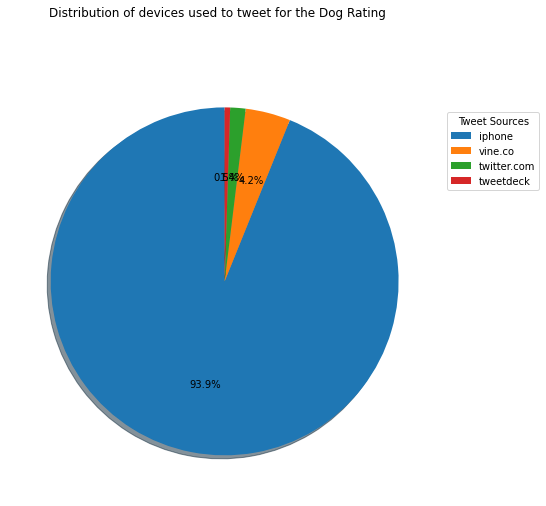

In [493]:
##Visualization
# A pie plot of the sources of devices used to tweet
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
wedges, texts, autotexts = ax.pie(master_df.tweet_source.value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)
ax.legend(wedges, master_df.tweet_source.value_counts().index, title="Tweet Sources", loc="center left", bbox_to_anchor=(1, 0.3, 0.5, 1))
fig.suptitle('Distribution of devices used to tweet for the Dog Rating');

_94.3% (2221 out of 2356) of the total tweets were done via the iphone, while other tweets 5.7% were done via vine.co, twitter.com and tweetdeck_

#### 2. Proportions of the dog stages for the rated dogs

In [494]:
(master_df.dog_stages.count(), str(round(master_df.dog_stages.count()/len(master_df)*100, 2))+'%')

(2175, '100.0%')

In [495]:
master_df.dog_stages.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo&pupper       10
floofer             9
doggo&puppo         1
doggo&floofer       1
Name: dog_stages, dtype: int64

In [496]:
master_df.dog_stages.value_counts(normalize=True).mul(100).round(2)

None             84.18
pupper           10.30
doggo             3.45
puppo             1.10
doggo&pupper      0.46
floofer           0.41
doggo&puppo       0.05
doggo&floofer     0.05
Name: dog_stages, dtype: float64

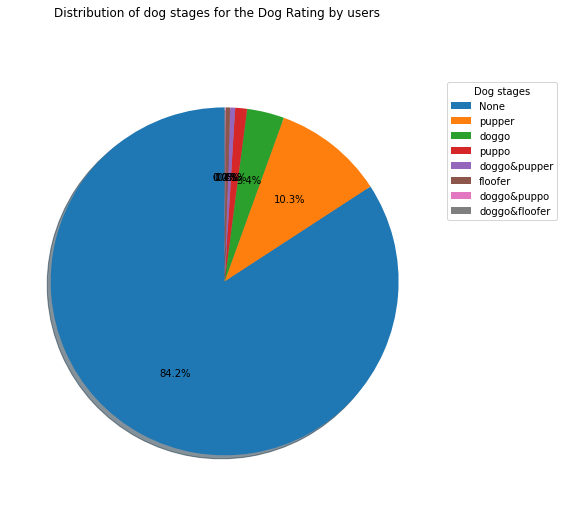

In [497]:
##Visualization
# A pie plot of the affectionate terms used in the tweet rating
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
wedges, texts, autotexts = ax.pie(master_df.dog_stages.value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)
ax.legend(wedges, master_df.dog_stages.value_counts().index, title="Dog stages", loc="center left", bbox_to_anchor=(1, 0.3, 0.5, 1))
fig.suptitle('Distribution of dog stages for the Dog Rating by users');

_Dog stages were expressed with 15.82% (344 out of 2170) of the tweets on the Dog ratings, while the majority of the tweets had none_

#### 3. Dog stages and Retweet counts

In [498]:
master_df.groupby(['dog_stages'])['retweet.count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stages,,,,,,,,
None,1831.0,2078.394866,3350.569776,0.0,439.00,1014.0,2425.50,51738.0
doggo,75.0,5235.400000,10806.009540,0.0,1568.50,2290.0,4136.50,70820.0
doggo&floofer,1.0,2798.000000,NaN,2798.0,2798.00,2798.0,2798.00,2798.0
doggo&pupper,10.0,3351.900000,4322.864417,1006.0,1820.25,2088.5,2488.75,15558.0
doggo&puppo,1.0,16149.000000,NaN,16149.0,16149.00,16149.0,16149.00,16149.0
floofer,9.0,3343.222222,4452.148520,397.0,932.00,2053.0,3085.00,14752.0
pupper,224.0,1985.558036,3166.468961,24.0,552.00,995.5,2014.75,30242.0
puppo,24.0,5205.125000,8258.073195,148.0,1321.50,2526.0,5653.00,39965.0


In [504]:
dog_stages_df = master_df.groupby(['dog_stages'])['retweet.count'].describe().reset_index()

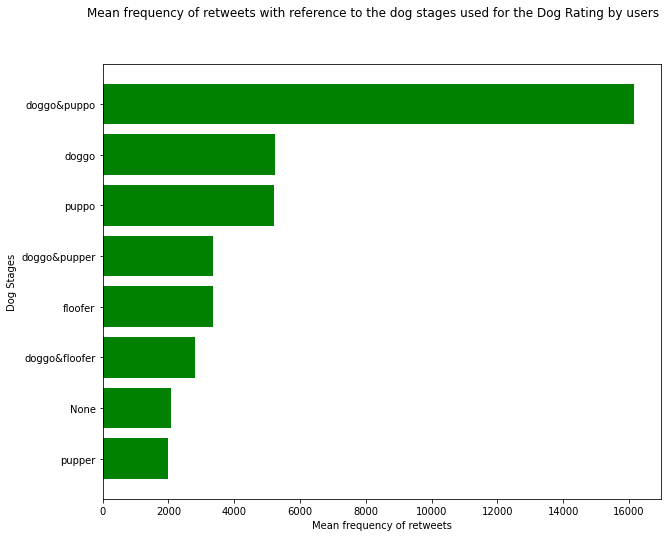

In [507]:
##Visualization
# A pie plot of the sources of devices used to tweet
dog_stages_df.sort_values('mean', inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.barh(dog_stages_df['dog_stages'], dog_stages_df['mean'], color='green')
ax.set_xlabel('Mean frequency of retweets')
ax.set_ylabel('Dog Stages')
fig.suptitle('Mean frequency of retweets with reference to the dog stages used for the Dog Rating by users');

_Tweets with one or more dog stage descriptions were retweeted more than tweets without stages_